In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd

In [44]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [46]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [47]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [48]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

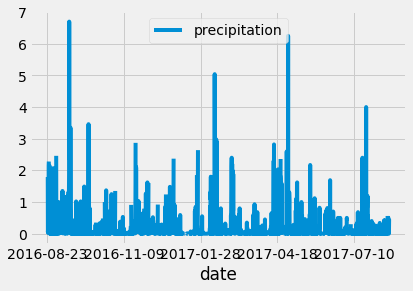

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)  - dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Perform a query to retrieve the data and precipitation scores
print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [31]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

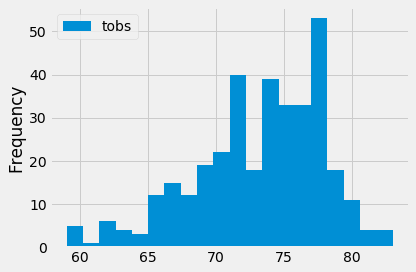

In [41]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)
df = pd.DataFrame(results, columns=['tobs'])
print(df)
df.plot.hist(bins=20)
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    if not end:
                results = session.query(*sel).\
                filter(Measurement.date <= start).all()
                temps = list(np.ravel(results))
                return jsonify(temps)

        results = session.query(*sel).\
                        filter(Measurement.date >= start).\
                        filter(Measurement.date <= end).all()
        temps = list(np.ravel(results))
        return jsonify(temps)

# Challenge

In [50]:
#A. Identify key statistical data in June across all of the stations and years using the describe() function.
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [52]:
import numpy as np
import pandas as pd
import datetime as dt

In [53]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [54]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [55]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [56]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [57]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [60]:
#June Precipitation data
june_pcrp_results = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "06").all()
print(june_pcrp_results)
june_pcrp_df = pd.DataFrame(june_pcrp_results, columns=['date','precipitation'])
june_pcrp_df.describe()


[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [62]:
#June Station data
june_station_results = session.query(Measurement.station, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
print(june_station_results)
june_station_df = pd.DataFrame(june_station_results, columns=['station','tobs'])
june_station_df.describe()

[('USC00519397', 78.0), ('USC00519397', 76.0), ('USC00519397', 78.0), ('USC00519397', 76.0), ('USC00519397', 77.0), ('USC00519397', 78.0), ('USC00519397', 77.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 79.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 77.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 77.0), ('USC00519397', 77.0), ('USC00519397', 82.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 77.0), ('USC00519397', 76.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 78.0), ('USC00519397', 77.0), ('USC00519397', 78.0), ('USC00519397', 73.0), ('USC00519397', 70.0), ('USC00519397', 76.0), ('USC00519397', 77.0), ('USC00519397', 77.0), ('USC00519397', 77.0), ('USC00519397', 77.0), ('USC00519397', 78.0), ('USC00519397', 77.0), ('USC00519397', 77.0), ('USC00519397', 78.0), ('USC00519

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [63]:
#B. Identify key statistical data in December across all stations and years using the describe() function.
#December precipitation data
dec_pcrp_results = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "12").all()
print(dec_pcrp_results)
dec_pcrp_df = pd.DataFrame(dec_pcrp_results, columns=['date','precipitation'])
dec_pcrp_df.describe()

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [64]:
#December Station data
dec_station_results = session.query(Measurement.station, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()
print(dec_station_results)
dec_station_df = pd.DataFrame(dec_station_results, columns=['station','tobs'])
dec_station_df.describe()

[('USC00519397', 76.0), ('USC00519397', 74.0), ('USC00519397', 74.0), ('USC00519397', 64.0), ('USC00519397', 64.0), ('USC00519397', 67.0), ('USC00519397', 77.0), ('USC00519397', 66.0), ('USC00519397', 69.0), ('USC00519397', 68.0), ('USC00519397', 68.0), ('USC00519397', 71.0), ('USC00519397', 74.0), ('USC00519397', 67.0), ('USC00519397', 66.0), ('USC00519397', 69.0), ('USC00519397', 71.0), ('USC00519397', 70.0), ('USC00519397', 70.0), ('USC00519397', 74.0), ('USC00519397', 74.0), ('USC00519397', 71.0), ('USC00519397', 75.0), ('USC00519397', 75.0), ('USC00519397', 72.0), ('USC00519397', 69.0), ('USC00519397', 68.0), ('USC00519397', 73.0), ('USC00519397', 74.0), ('USC00519397', 73.0), ('USC00519397', 73.0), ('USC00519397', 73.0), ('USC00519397', 73.0), ('USC00519397', 71.0), ('USC00519397', 73.0), ('USC00519397', 73.0), ('USC00519397', 77.0), ('USC00519397', 72.0), ('USC00519397', 71.0), ('USC00519397', 73.0), ('USC00519397', 70.0), ('USC00519397', 73.0), ('USC00519397', 69.0), ('USC00519

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [65]:
# Share your findings in the Jupyter Notebook with a few sentences describing the key differences in weather
# between June and December and 2-3 recommendations for further analysis

In [66]:
## Key Differences in weather between June and December in O'ahu

# Average temperature in O'ahu in June and December averages between 71 - 75 degrees, with a low 56 degrees in December
# and a high temp of 83 degrees. In June, expect low temperatures in mid-60s, while high temps are at 85 degrees.
# Temperature-wise, customers should be able to enjoy store products either in June or December.
# However, expect more precipitation in December, wherein maximum is measured at 6.4mm but it averages about 0.21mm. 
# There is also precipitation in June, with a max of 4.4mm and average of 0.13mm. 

## Recommendation for further analysis
# a. Quarterly weather change
# b. 5-yr analysis
